# Combined Problem : Logistic Regression & Multiple Linear Regression

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Problem 1: Logistic Regression using `bank_data.csv`

In [10]:
# Load dataset
df= pd.read_csv("/content/bank_data.csv")
df.head()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,poutfailure,...,johousemaid,jomanagement,joretired,joself.employed,joservices,jostudent,jotechnician,jounemployed,jounknown,y
0,58,0,2143,1,0,261,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,44,0,29,1,0,151,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,76,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,92,1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,198,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45211 non-null  int64
 1   default          45211 non-null  int64
 2   balance          45211 non-null  int64
 3   housing          45211 non-null  int64
 4   loan             45211 non-null  int64
 5   duration         45211 non-null  int64
 6   campaign         45211 non-null  int64
 7   pdays            45211 non-null  int64
 8   previous         45211 non-null  int64
 9   poutfailure      45211 non-null  int64
 10  poutother        45211 non-null  int64
 11  poutsuccess      45211 non-null  int64
 12  poutunknown      45211 non-null  int64
 13  con_cellular     45211 non-null  int64
 14  con_telephone    45211 non-null  int64
 15  con_unknown      45211 non-null  int64
 16  divorced         45211 non-null  int64
 17  married          45211 non-null  int64
 18  single

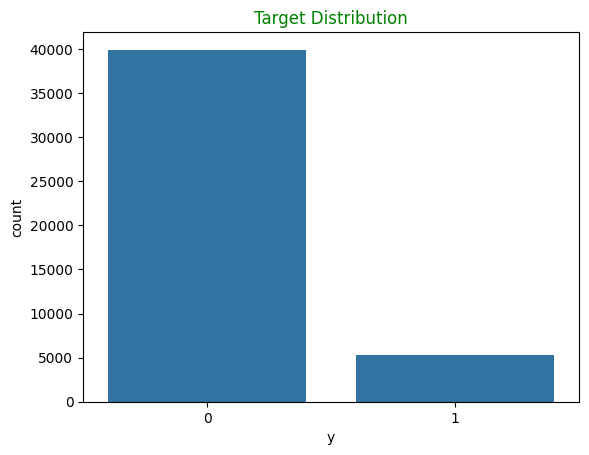

In [11]:
# EDA
print(df.info())
print(df.describe())

sns.countplot(data=df, x='y')
plt.title("Target Distribution",color=  "green")
plt.show()

In [12]:
# Encode categorical variables
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object'):
    df_encoded[col] = le.fit_transform(df_encoded[col])

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

Accuracy: 0.8914077186774301
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.62      0.26      0.37      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.62      0.65      9043
weighted avg       0.87      0.89      0.87      9043

Confusion Matrix:
 [[7775  177]
 [ 805  286]]


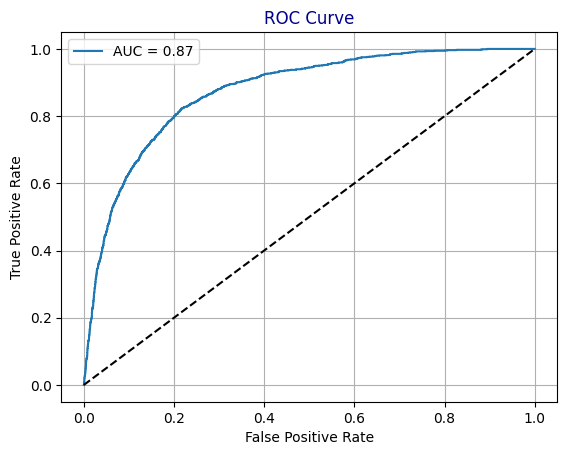

In [16]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

y_prob = log_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve", color= "darkblue")
plt.legend()
plt.grid()
plt.show()

# Problem 2: Multiple Linear Regression using `50_Startups.csv`

In [21]:
# Load dataset
df_mlr_encoded = pd.read_csv("/content/50_Startups.csv")
df_mlr_encoded.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
 4   State_Florida    50 non-null     bool   
 5   State_New York   50 non-null     bool   
dtypes: bool(2), float64(4)
memory usage: 1.8 KB
None
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.

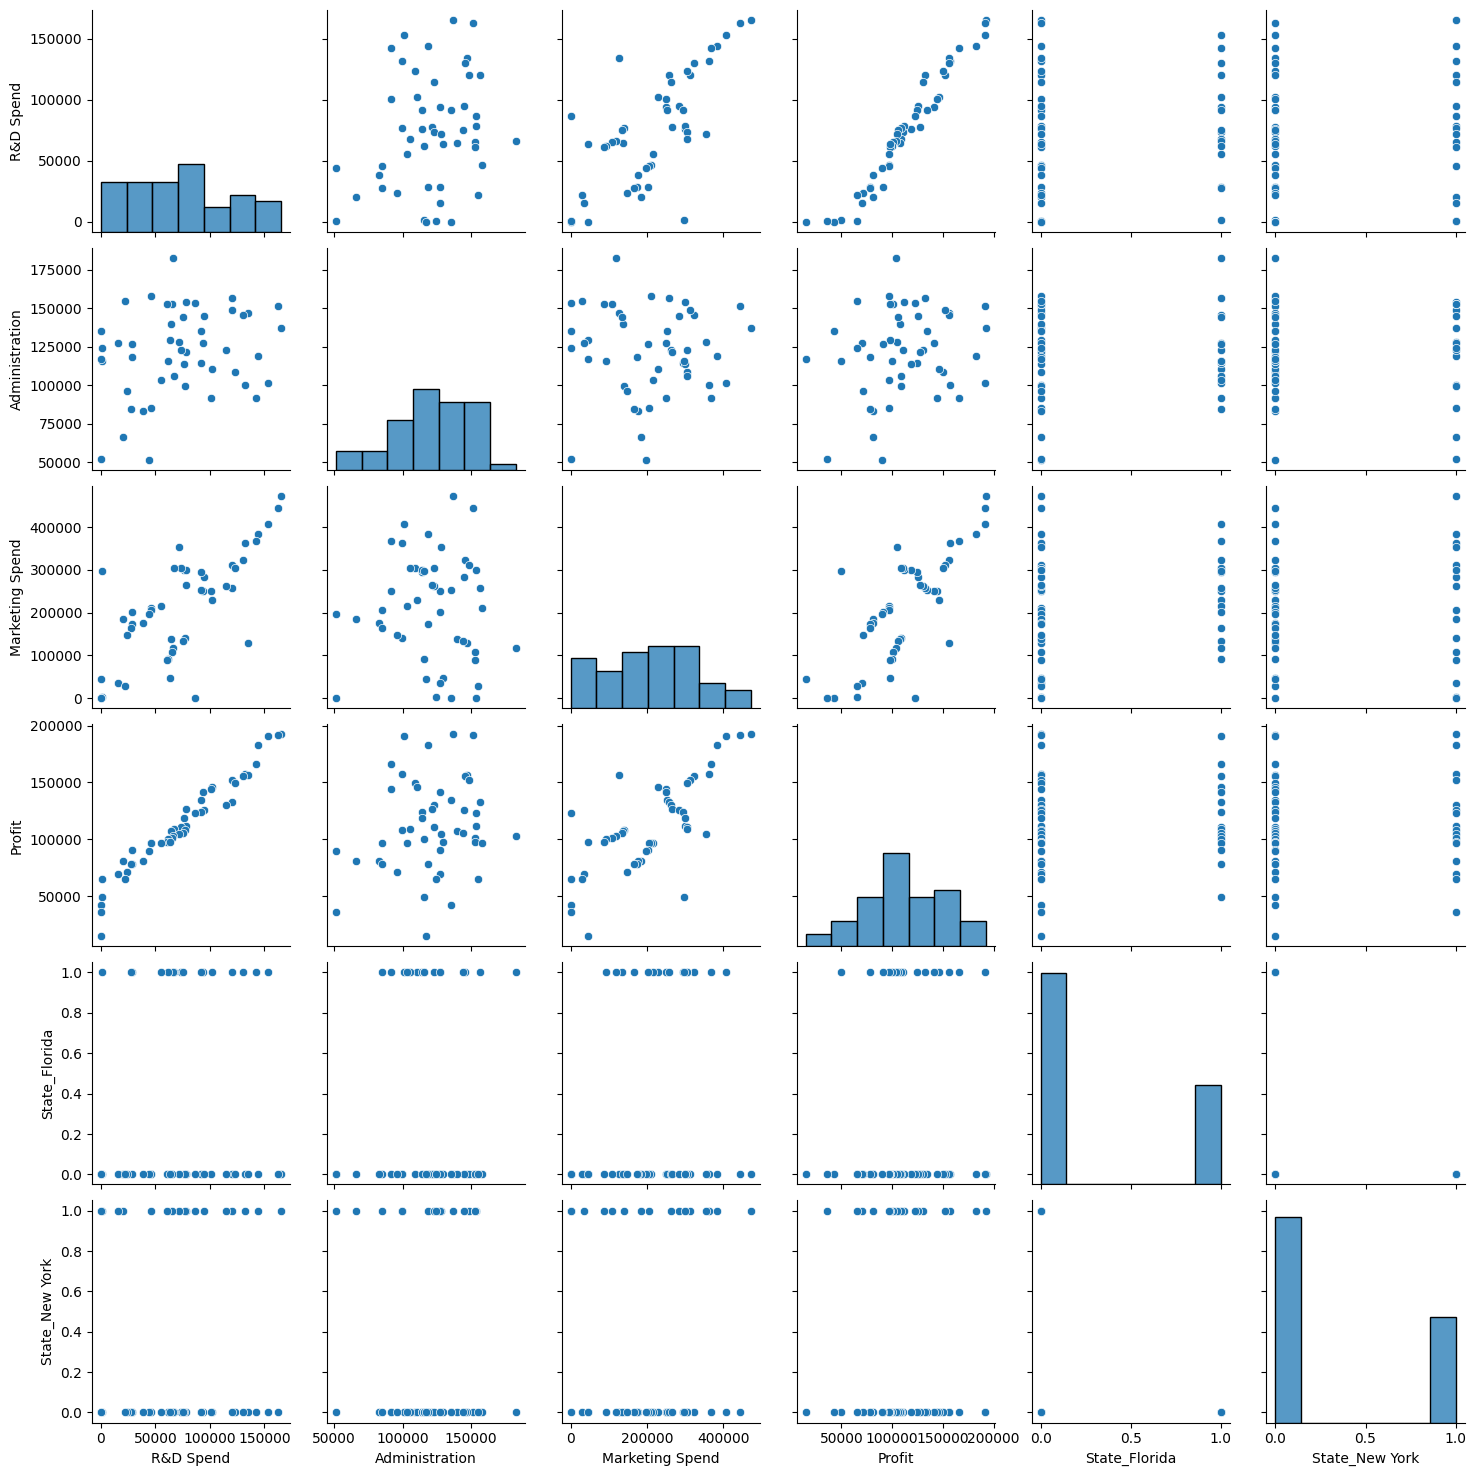

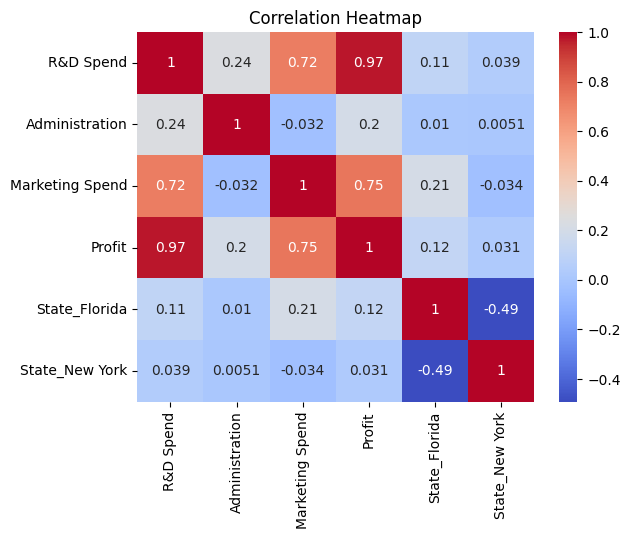

In [30]:
# EDA
print(df_mlr_encoded.info())
print(df_mlr_encoded.describe())

sns.pairplot(df_mlr_encoded)
plt.show()

sns.heatmap(df_mlr_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [35]:
# Preprocessing
df_mlr_encoded = pd.get_dummies(df_mlr_encoded, drop_first=True)
X_mlr = df_mlr_encoded.drop("Profit", axis=1)
y_mlr = df_mlr_encoded["Profit"]

X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X_mlr, y_mlr, test_size=0.2, random_state=42)

In [32]:
# Model 1: Basic MLR
model1 = LinearRegression()
model1.fit(X_train_mlr, y_train_mlr)
y_pred1 = model1.predict(X_test_mlr)

print("Model 1 R2 Score:", r2_score(y_test_mlr, y_pred1))
print("Model 1 RMSE:", np.sqrt(mean_squared_error(y_test_mlr, y_pred1)))

Model 1 R2 Score: 0.8987266414328637
Model 1 RMSE: 9055.957323458464


In [33]:
# Model 2: Drop 'Marketing Spend'
X_mlr2 = X_mlr.drop("Marketing Spend", axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_mlr2, y_mlr, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)

print("Model 2 R2 Score:", r2_score(y_test2, y_pred2))
print("Model 2 RMSE:", np.sqrt(mean_squared_error(y_test2, y_pred2)))

Model 2 R2 Score: 0.8928146452925971
Model 2 RMSE: 9316.536408902924


In [34]:
# Model 3: Standardized
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_mlr)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_scaled, y_mlr, test_size=0.2, random_state=42)

model3 = LinearRegression()
model3.fit(X_train3, y_train3)
y_pred3 = model3.predict(X_test3)

print("Model 3 R2 Score:", r2_score(y_test3, y_pred3))
print("Model 3 RMSE:", np.sqrt(mean_squared_error(y_test3, y_pred3)))

Model 3 R2 Score: 0.8987266414319837
Model 3 RMSE: 9055.957323497812


---------------------------------------------------------------------------
  # ASSIGNMENT COMPLETED
---------------------------------------------------------------------------